#### Прежде чем продолжить обучение алгоритмов
необходимо доработать наши данные

In [1]:
import pandas as pd

In [2]:
#загружаем данные, оставшиеся после прошлой предобработки (см. Part_1)
PATH_TO_TRAIN = 'train_imputed.csv'
PATH_TO_TEST = 'test_imputed.csv'

In [4]:
#Загрузка данных
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId') #обучающая выборка
test = pd.read_csv(PATH_TO_TEST, index_col='PassengerId') #тестовая выборка

In [6]:
#Проверка данных на заполненность
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Family_size  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Family_size  418 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 29.4+ KB


#### Отделяем целевую переменную от обучающей выборки

In [8]:
#Отделим колонку с "ответом" от тестовой выборки, чтобы не путать алгоритм

y_train = train['Survived']
train_sep = train.drop(columns=['Survived'])

#### Кодирование категориальных признаков (one-hot-encoding)

In [17]:
#One-hot-encoding категориальных переменных
def encode_categorical(df_train, df_test):
    test_start_ind = df_train.index[-1] #запомнили индекс с которого начинаются тестовые данные
    
    concated_df = pd.concat([df_train, df_test], sort=False) #объединили обучающую выборку с тестовой,
                                                             #для корректности преобразования
    
    encoded_df = pd.get_dummies(concated_df, drop_first=True) #преобразовали
    
    df_train_encoded, df_test_encoded = encoded_df.iloc[:test_start_ind, :],encoded_df.iloc[test_start_ind:, :] #разъединили
    
    return df_train_encoded, df_test_encoded

In [18]:
X_train, X_test = encode_categorical(train_sep, test)

In [23]:
#Результат
X_test

,Unnamed: 0,Pclass,Age,SibSp,Parch,Fare,Family_size,Sex_male
PassengerId,,,,,,,,
892,0,3,34.5,0,0,7.8292,0,1
893,1,3,47.0,1,0,7.0000,1,0
894,2,2,62.0,0,0,9.6875,0,1
895,3,3,27.0,0,0,8.6625,0,1
896,4,3,22.0,1,1,12.2875,2,0
...,...,...,...,...,...,...,...,...
1305,413,3,27.0,0,0,8.0500,0,1
1306,414,1,39.0,0,0,108.9000,0,0
1307,415,3,38.5,0,0,7.2500,0,1


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Family_size  891 non-null    int64  
 7   Sex_male     891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 56.6 KB


In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Family_size  418 non-null    int64  
 7   Sex_male     418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 26.5 KB


#### Переходим к работе с алгоритмом Decision Tree

##### Обучение

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
#Создание экземпляра класса
dt_clf = DecisionTreeClassifier()

In [34]:
dt_clf.fit(X_train, y_train) #обучение

DecisionTreeClassifier()

In [35]:
pred_dt_simple = dt_clf.predict(X_test)#предсказание результата

##### Визуализация решающего дерева

In [79]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display

def vizualize_tree(clf, X, file_name):
    
    export_graphviz(clf, feature_names=X.columns, out_file=file_name + '.dot', filled=True)
    
    #при помощи восклицательного знака можно вызвать терминал
    !dot -Tpng {file_name}.dot -o {file_name}.png
    
    display(Image(filename=file_name + '.png'))

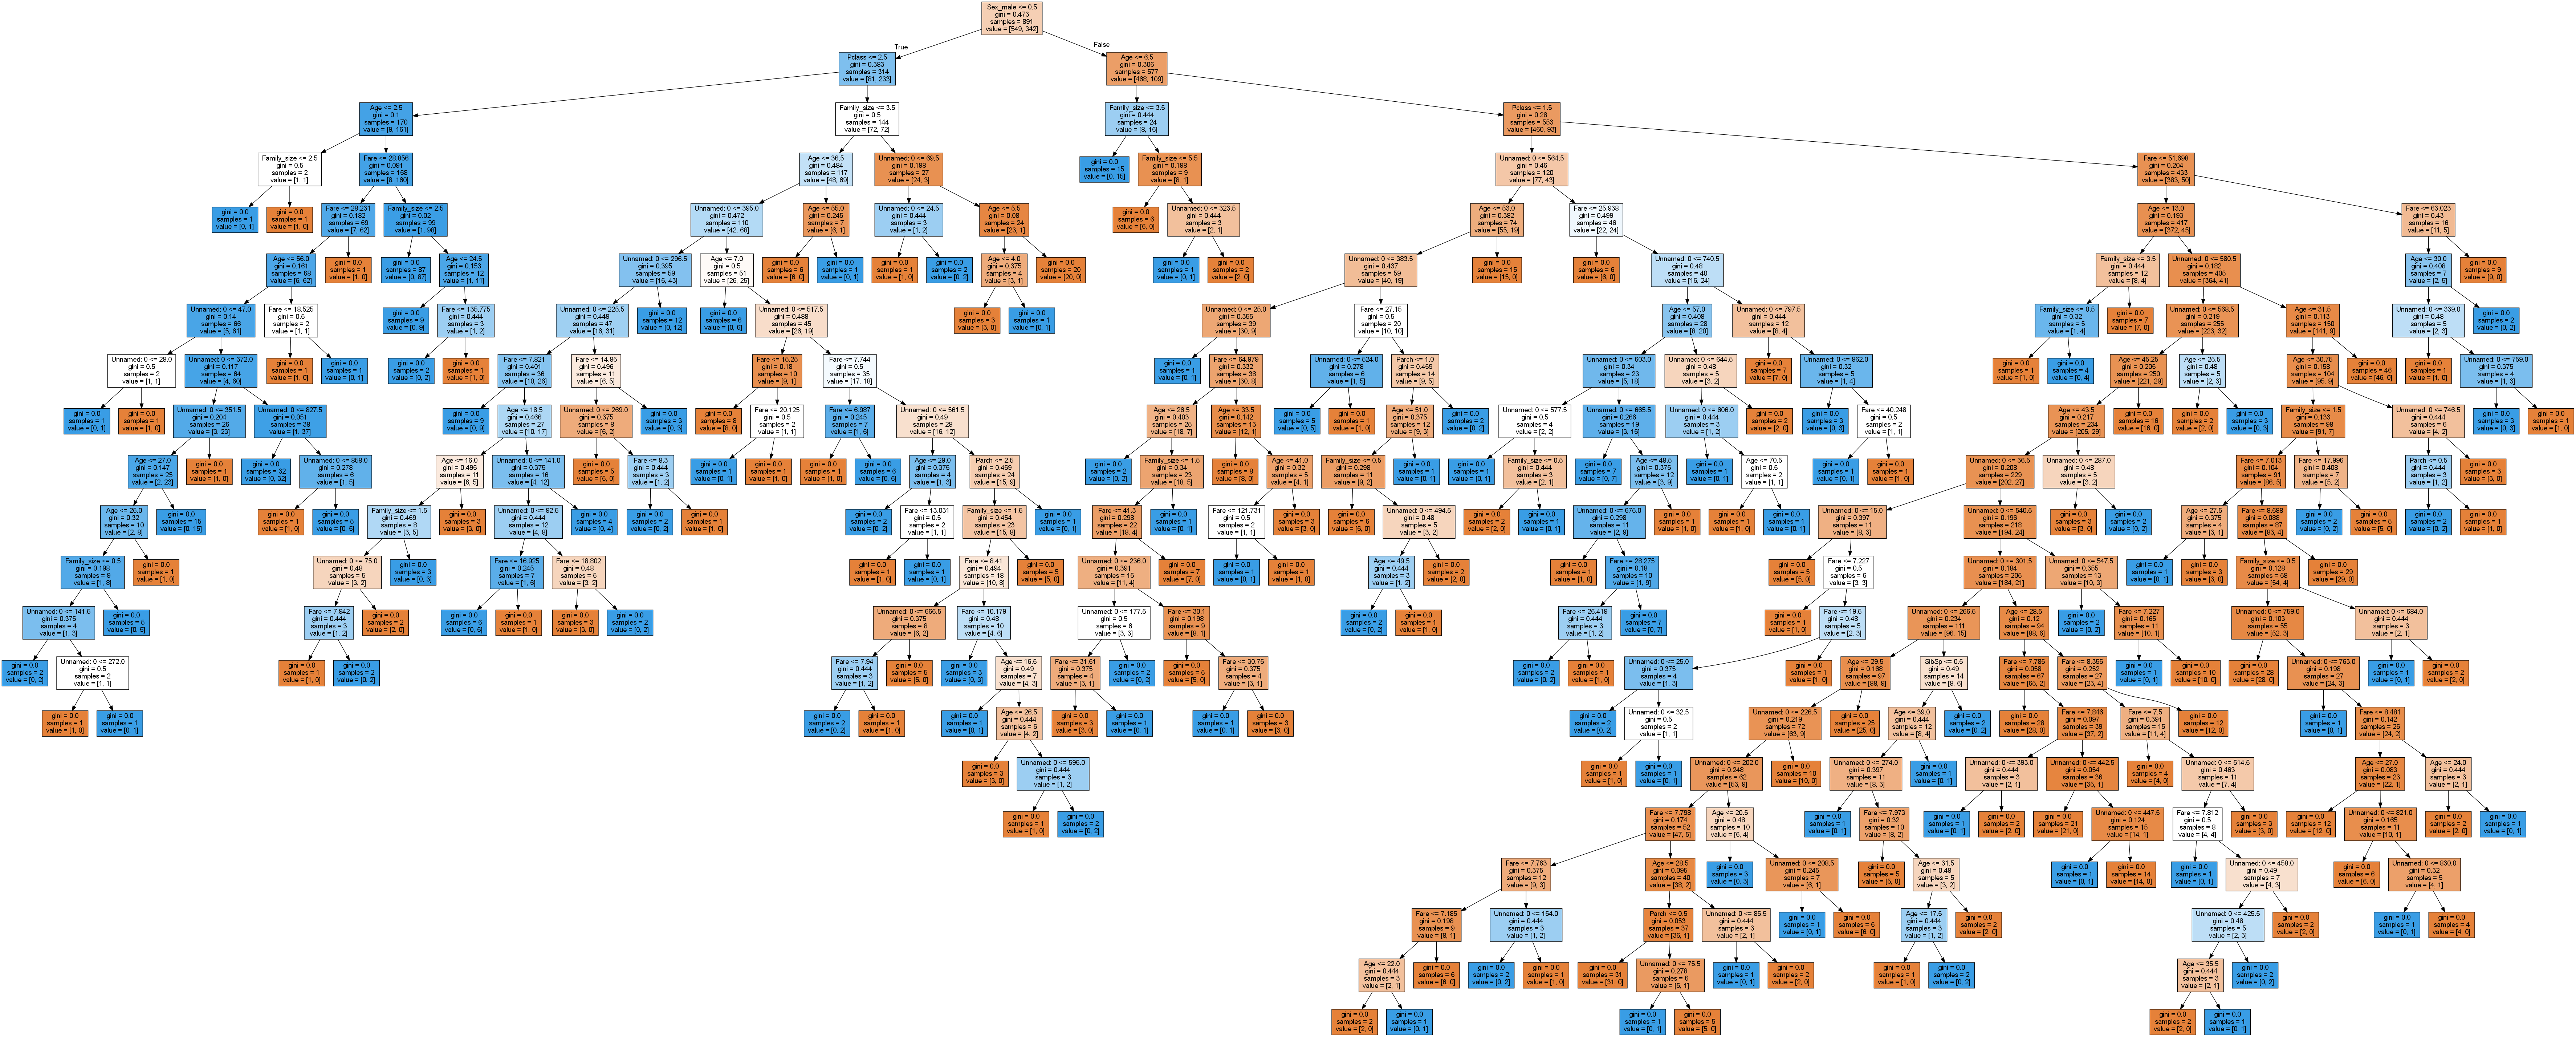

In [80]:
#Естественно это не самый лучший вариант. Сейчас мы будем его дорабатывать.
vizualize_tree(dt_clf, X_train, 'tree')

#### Подбор гиперпараметров с помощью GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
clf = DecisionTreeClassifier()

parameters = {
            'criterion': ['entropy', 'gini'],
            'max_depth': range(1,10),
            'min_samples_split': range(2,10),
            'min_samples_leaf': range(1,10)
            }

grid_cv = GridSearchCV(clf, parameters, cv=5)

In [88]:
%%time

grid_cv.fit(X_train, y_train) #Подбираем лучшие параметры

CPU times: total: 31.5 s
Wall time: 31.5 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [89]:
#выбираем лучшую модель из обученных
best_model = grid_cv.best_estimator_

In [90]:
print('Лучшие параметры классификатора', grid_cv.best_params_)

Лучшие параметры классификатора {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [91]:
#делаем предсказание
grid_pred = best_model.predict(X_test)

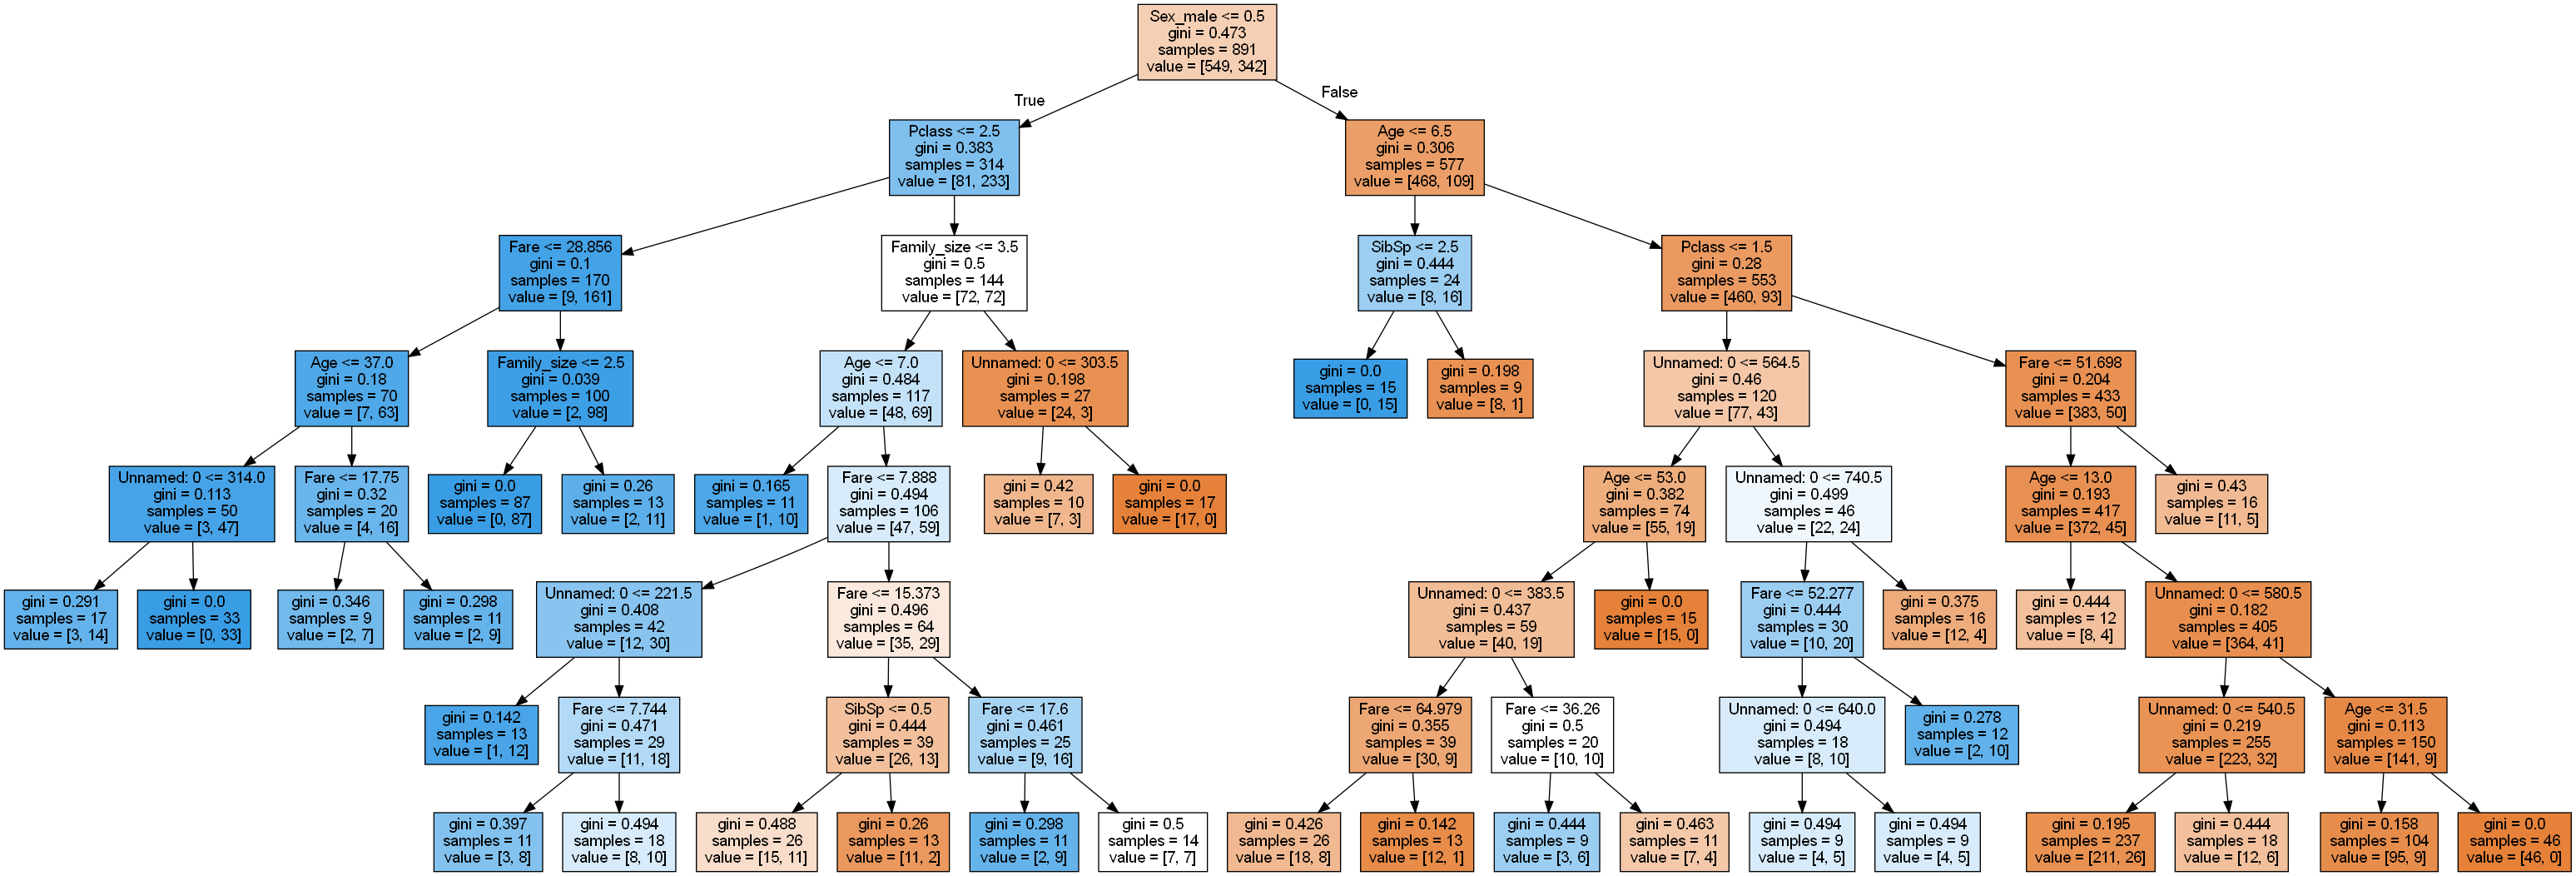

In [92]:
vizualize_tree(best_model, X_train, 'tree_gridsearch')

#### Более быстрый подбор гиперпараметров
Рандомный метод отбора параметров проходит не все возможные параметры, а получает только некоторые из них, соответственно это быстрее. Ну и разумеется это отразится на качестве итоговой модели.

In [93]:
#импортируем необходимый нам модуль
from sklearn.model_selection import RandomizedSearchCV

In [94]:
random_grid_cv = RandomizedSearchCV(clf, parameters, cv=5)

In [95]:
%%time

random_grid_cv.fit(X_train, y_train); #Обучаем

CPU times: total: 250 ms
Wall time: 247 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [96]:
#выбираем лучшую модель из обученных
best_model_rand = random_grid_cv.best_estimator_

In [97]:
print('Лучшие параметры классификатора', random_grid_cv.best_params_)

Лучшие параметры классификатора {'min_samples_split': 4, 'min_samples_leaf': 7, 'max_depth': 3, 'criterion': 'entropy'}


In [99]:
#делаем предсказание
rand_grid_pred = best_model_rand.predict(X_test)

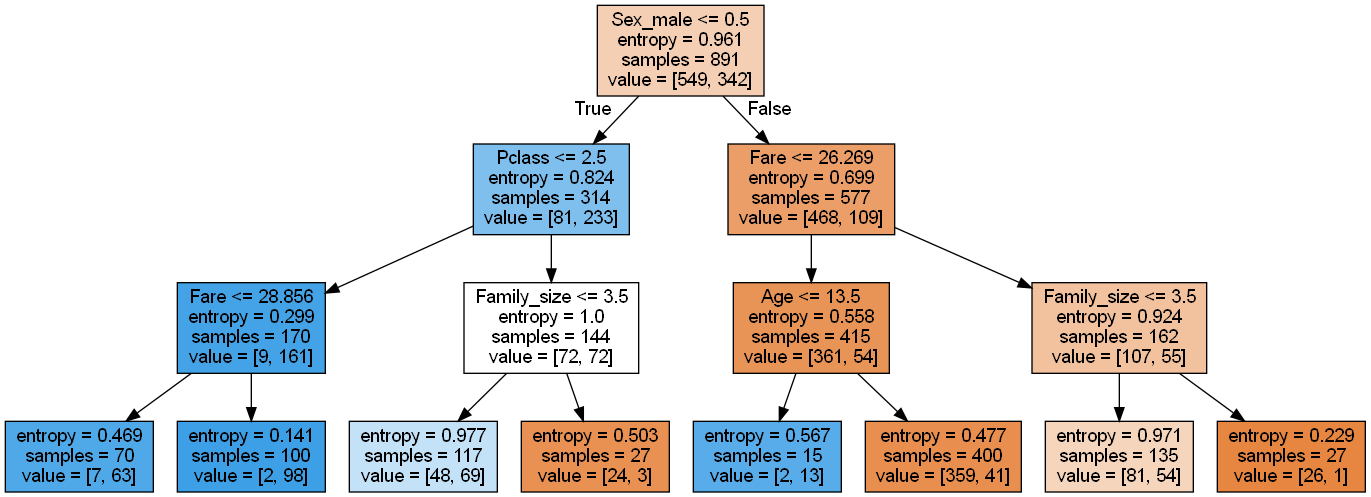

In [100]:
vizualize_tree(best_model_rand, X_train, 'tree_rand')

#### Результаты

In [101]:
#функция для составления submission-файла соревнования

def make_prediction_file(prediction, test_data, name):
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], 'Survived': prediction})
    result.to_csv(name, index=False)

#### 1) Простое решающее дерево

In [102]:
make_prediction_file(pred_dt_simple, test, 'titanic_dt_simple.csv')

#### 2) Дерево, построенное с помощью GridSearchCV (лучший результат)

In [103]:
make_prediction_file(grid_pred, test, 'titanic_dt_gridcv.csv')

#### 3) Дерево, построенное с помощью RandomGridSearchCV (лучше обычного, но хуже лучшего)

In [104]:
make_prediction_file(rand_grid_pred, test, 'titanic_dt_rand_search.csv')

#### Немного о переобучении
Перебор всех параметров не всегда самое лучшее решение. Дерево можно ограничить самостоятельно в количестве вопросов.

In [105]:
dt_best = DecisionTreeClassifier(max_depth = 4)

dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

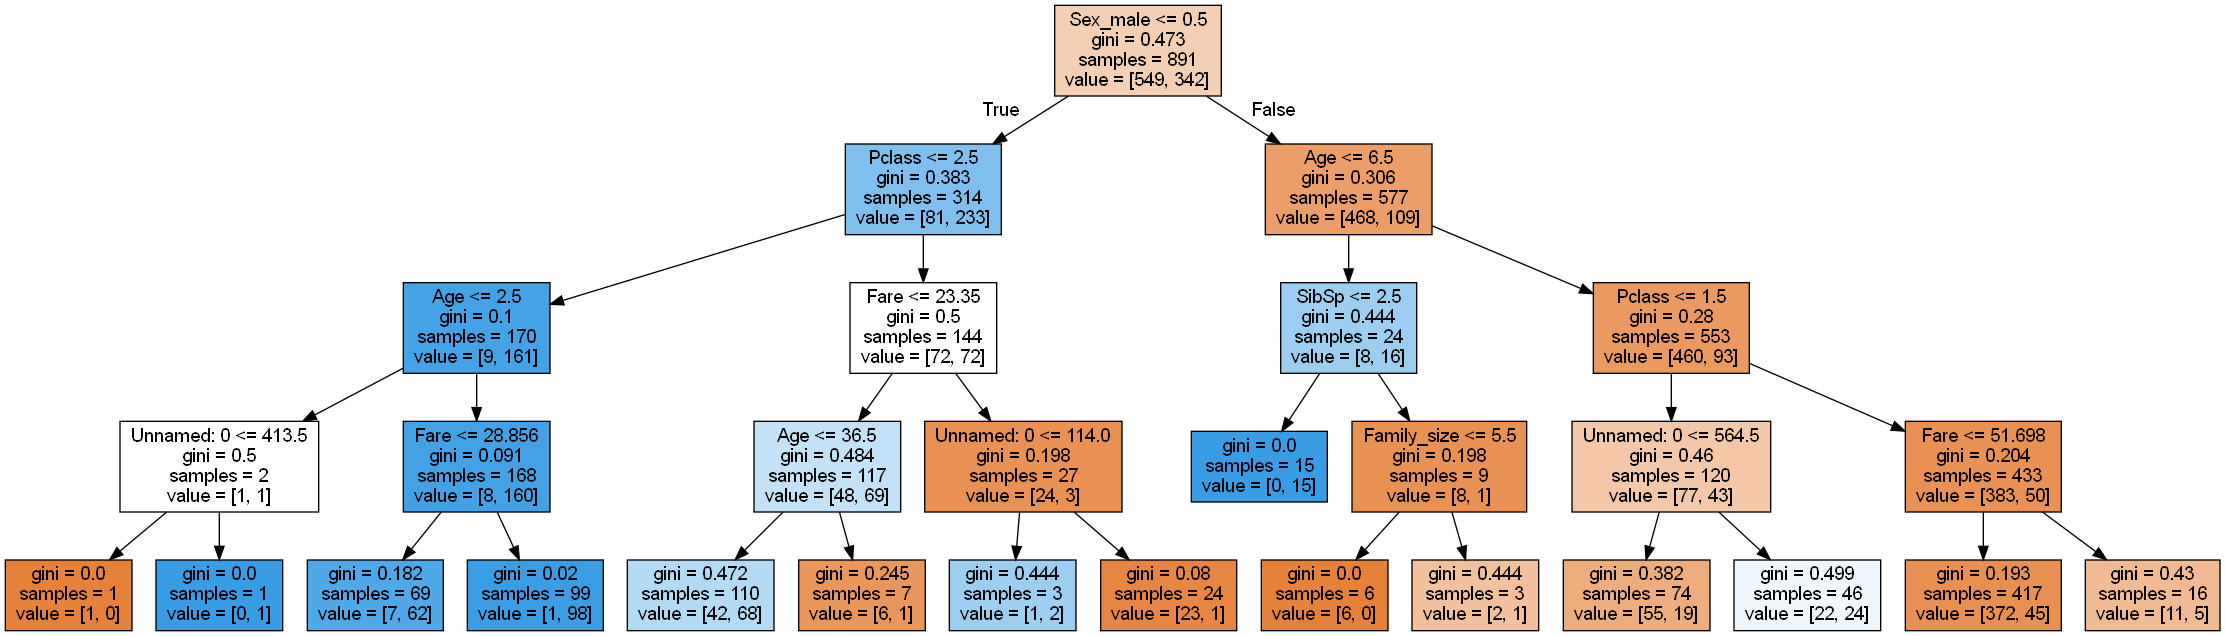

In [106]:
vizualize_tree(dt_best, X_train, 'tree_best')

In [107]:
pred_tree_best = dt_best.predict(X_test)

make_prediction_file(pred_tree_best, test, 'titanic_dt_best.csv')

### ИТОГ
1 - Закончили предобработку данных;

2 - Использовали алгоритм DecisionTree;

3 - Использовали предсказания fit-->predict;

4 - Использовали различные способы подбора гиперпараметров;

5 - Рассмотрели тему переобучения модели;

6 - Получили довольно точное и интерпретируемое решение.

### Жизненный цикл ML-эксперимента:

1 - Получение данных;

2 - Загрузка данных;

3 - Анализ, добаботка/заполнение;

4 - Трансформация, чтобы алгоритм ML их лучше понял (Категориальные признаки ---> Количественные);

5 - Обучаем нашу модел;

6 - Смотрим на результат и оцениваем метрики.